<a href="https://colab.research.google.com/github/YUVASRI2K/Handwritten-Digit-RecognitionusingDeepLearning-Yuvasri/blob/main/RFC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

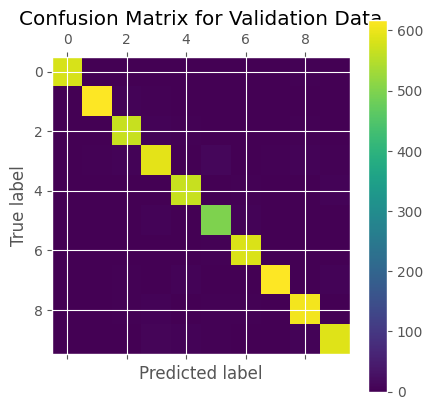

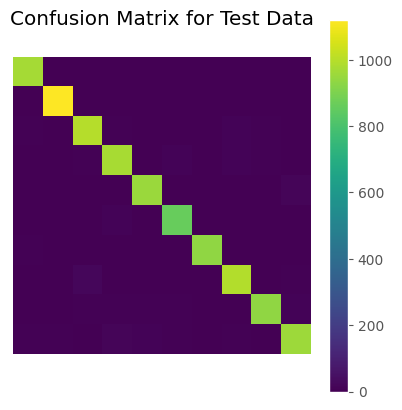

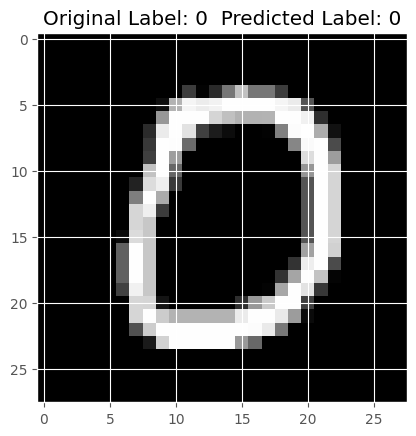

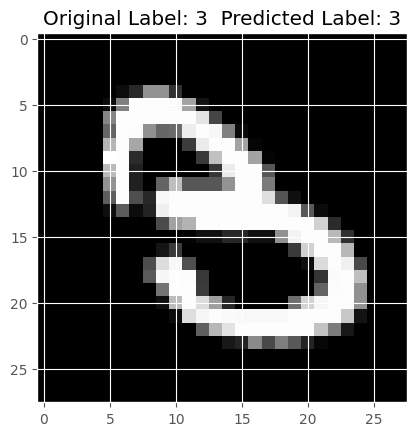

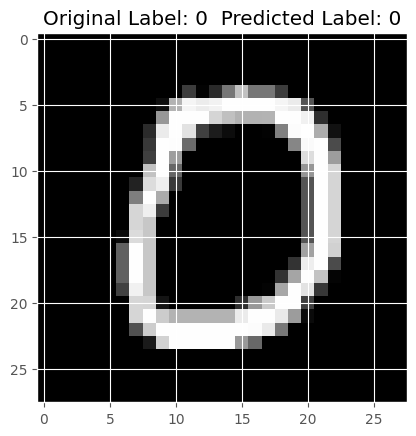

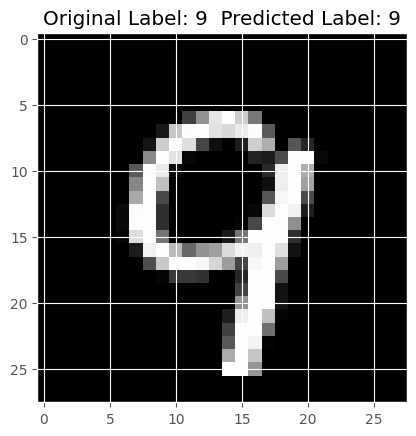

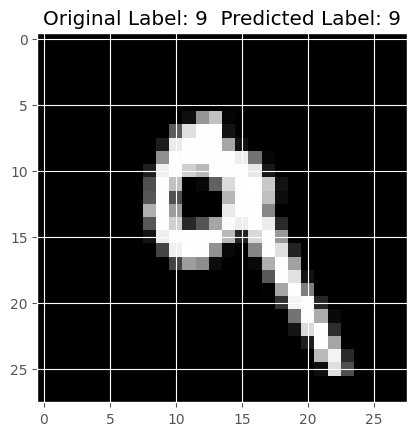

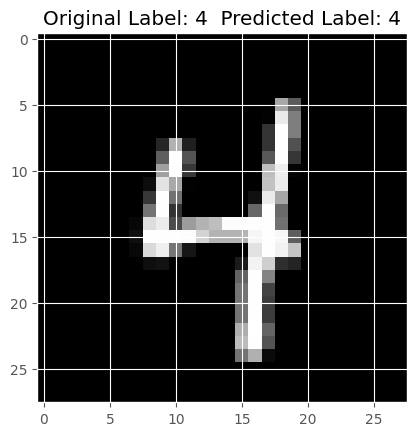

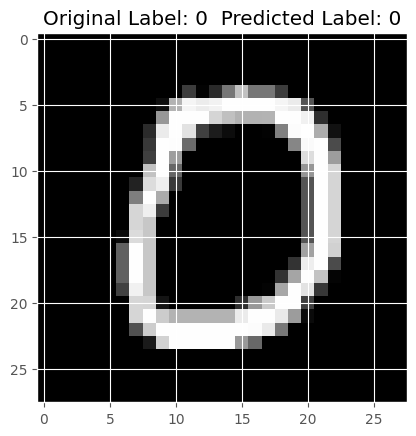

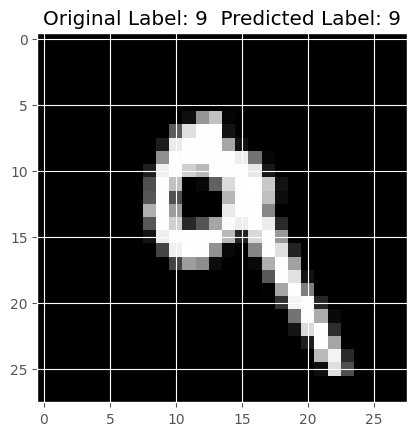

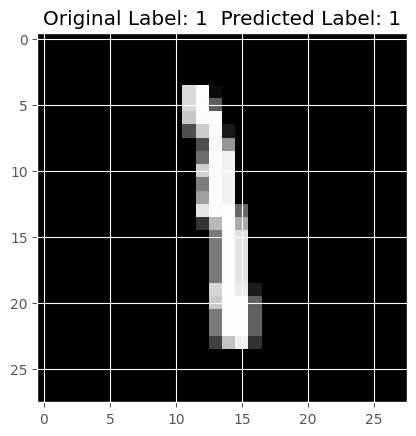

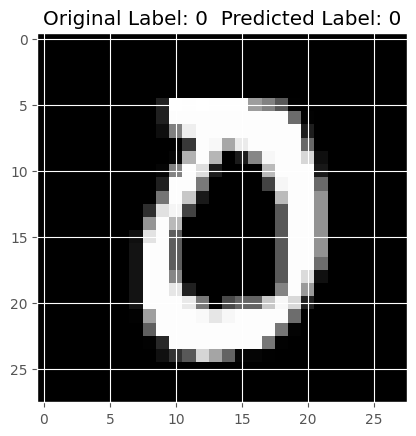

In [7]:
import sys
import struct
import numpy as np
import pickle
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

# MNIST Loader Functions
def load_mnist_images(filename):
    with open(filename, 'rb') as f:
        magic_number, num_images, rows, cols = struct.unpack(">IIII", f.read(16))
        images = np.fromfile(f, dtype=np.uint8).reshape(num_images, rows * cols)
        return images / 255.0  # Normalize pixel values to [0, 1]

def load_mnist_labels(filename):
    with open(filename, 'rb') as f:
        magic_number, num_labels = struct.unpack(">II", f.read(8))
        labels = np.fromfile(f, dtype=np.uint8)
        return labels


old_stdout = sys.stdout
log_file = open("summary.log", "w")
sys.stdout = log_file

print('\nLoading MNIST Data...')

# Load training data
print('\nLoading Training Data...')
train_img = load_mnist_images('/content/train-images-idx3-ubyte')
train_labels = load_mnist_labels('/content/train-labels-idx1-ubyte')

# Load testing data
print('\nLoading Testing Data...')
test_img = load_mnist_images('/content/t10k-images-idx3-ubyte')
test_labels = load_mnist_labels('/content/t10k-labels-idx1-ubyte')


# Features
X = train_img

# Labels
y = train_labels

print('\nPreparing Classifier Training and Validation Data...')
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.1)

print('\nRandom Forest Classifier with n_estimators = 100, n_jobs = 10')
print('\nPickling the Classifier for Future Use...')
clf = RandomForestClassifier(n_estimators=100, n_jobs=10)
clf.fit(X_train, y_train)

with open('MNIST_RFC.pickle', 'wb') as f:
    pickle.dump(clf, f)

pickle_in = open('MNIST_RFC.pickle', 'rb')
clf = pickle.load(pickle_in)

print('\nCalculating Accuracy of trained Classifier...')
confidence = clf.score(X_test, y_test)

print('\nMaking Predictions on Validation Data...')
y_pred = clf.predict(X_test)

print('\nCalculating Accuracy of Predictions...')
accuracy = accuracy_score(y_test, y_pred)

print('\nCreating Confusion Matrix...')
conf_mat = confusion_matrix(y_test, y_pred)

print('\nRFC Trained Classifier Confidence: ', confidence)
print('\nPredicted Values: ', y_pred)
print('\nAccuracy of Classifier on Validation Image Data: ', accuracy)
print('\nConfusion Matrix: \n', conf_mat)

# Plot Confusion Matrix Data as a Matrix
plt.matshow(conf_mat)
plt.title('Confusion Matrix for Validation Data')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

print('\nMaking Predictions on Test Input Images...')
test_labels_pred = clf.predict(test_img)

print('\nCalculating Accuracy of Trained Classifier on Test Data...')
acc = accuracy_score(test_labels, test_labels_pred)

print('\nCreating Confusion Matrix for Test Data...')
conf_mat_test = confusion_matrix(test_labels, test_labels_pred)

print('\nPredicted Labels for Test Images: ', test_labels_pred)
print('\nAccuracy of Classifier on Test Images: ', acc)
print('\nConfusion Matrix for Test Data: \n', conf_mat_test)

# Plot Confusion Matrix for Test Data
plt.matshow(conf_mat_test)
plt.title('Confusion Matrix for Test Data')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.axis('off')
plt.show()

sys.stdout = old_stdout
log_file.close()

# Show the Test Images with Original and Predicted Labels
a = np.random.randint(1, 30, 10)
for i in a:
    two_d = (np.reshape(test_img[i], (28, 28)) * 255).astype(np.uint8)
    plt.title('Original Label: {0}  Predicted Label: {1}'.format(test_labels[i], test_labels_pred[i]))
    plt.imshow(two_d, interpolation='nearest', cmap='gray')
    plt.show()
